# COGS 108 - Assignment 5: Data Analysis

# Important
- Rename this file to 'A5_A########.ipynb' (filled in with your student ID) before you submit it. Submit it to TritonED.
- Do not change / update / delete any existing cells with 'assert' in them. These are the tests used to check your assignment.
    - Changing these will be flagged for attempted cheating.
- Import cells are read only. If you add extra imports, these will not be imported when grading your assignment. 
- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted assignment for grading.
    - This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!
    - In particular many of the tests you can see simply check that the right variable names exist. Hidden tests check the actual values. 
        - It is up to you to check the values, and make sure they seem reasonable.

In [1]:
# Imports -  These are all you need for the assignment: do not import additional packages
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind

### Notes

Parts 1-5 of this assignment are modelled on showing you, and getting you to work through, a minimal example of a project notebook, mimicing what you will need for your final project.

Parts 6-8 of this assignment are separate (and breaks from the project narrative), and serve as a series of quick one-offs to get you working with some other methods that might be useful to incorporate into your project.

## Setup

Data: the responses collected from a survery of the COGS 108 class. 
- There are 377 observations in the data, covering 8 different 'features'.

Research Question: Do students in different majors have different heights?

Background: Physical height has previously shown to correlate with career choice, and career success. More recently it has been demonstrated that these correlations can actually be explained by height in high school, as opposed to height in adulthood (1). It is currently unclear whether height correlates with choice of major in university. 

Reference: 1) http://economics.sas.upenn.edu/~apostlew/paper/pdf/short.pdf

Hypothesis: We hypothesize that there will be a relation between height and chosen major. 

## Part 1: Load & Clean the Data

Note: for the purposes of the assignment we have provided you with an already cleaned version of the data, since cleaning the original response data would otherwise be a massive undertaking. 

In [2]:
# 1a) Import the data in the file 'CleanedIntroResponses.csv' into a DataFrame, called 'df'.

### BEGIN SOLUTION
df = pd.read_csv('CleanedIntroResponses.csv')
### END SOLUTION

In [3]:
assert isinstance(df, pd.DataFrame)

### BEGIN HIDDEN TESTS
assert df.shape == (377, 8)
### END HIDDEN TESTS

In [4]:
# 1b) Drop any rows with 'NaN' values. Use the pandas 'dropna' method, inplace. 

### BEGIN SOLUTION
df.dropna(inplace=True)
### END SOLUTION

In [5]:
assert df.shape == (335, 8)

In [6]:
# 1c) Use the pandas 'head' function to grab the first 12 rows of data. 
#  Save the output to variable called 'head'

### BEGIN SOLUTION
head = df.head(12)
### END SOLUTION

In [7]:
assert np.all(head)
assert head.shape == (12, 8)

In [8]:
# Print out the data saved to 'head'
head

,year,major,age,gender,height,weight,ice_cream,color
0,1.0,math,18.0,m,68.0,140.0,choc_mint,black
1,1.0,cogs,19.0,m,69.0,141.0,choc_mint,blue
2,1.0,cogs,24.0,m,70.0,210.0,choc_mint,blue
3,1.0,cogs,19.0,f,64.0,63.0,choc_mint,none
4,1.0,cogs,19.0,m,70.0,155.0,choc_mint,purple
5,1.0,undec,19.0,m,70.0,160.0,choc_mint,purple
6,1.0,cs,18.0,f,61.0,124.0,chubby_hubby,violet
7,1.0,math-cs,18.0,m,74.0,190.0,cookies_cream,black
8,1.0,math-cs,18.0,m,67.0,145.0,cookies_cream,rainbow
9,1.0,math-cs,18.0,m,73.0,67.0,green_tea,ultramarine


## Part 2: Exploratory Data Vizualization

First, we need to do some exploratory data visualization, to get a feel for the data. 

For plotting questions, do not change or move the 'plt.gcf()' lines. 

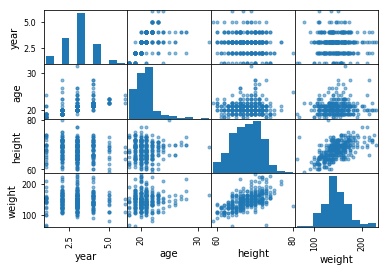

In [9]:
# 2a) Plot the data, using scatter_matrix, from Pandas. Assign it to a variable called 'fig'.

### BEGIN SOLUTION
fig = pd.scatter_matrix(df)
### END SOLUTION

In [10]:
assert np.all(fig)

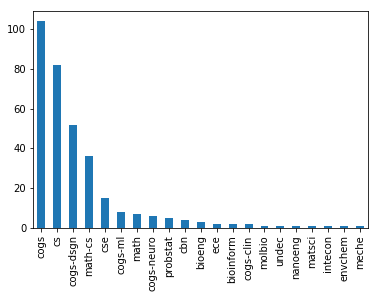

In [11]:
# 2b) Plot a bar chart showing the number of students in each majors. 
#  Hints: you can use 'value_counts' to get the counts for each major. 
#    You can then use the 'plot' method from pandas for plotting - you don't need matplotlib. 

### BEGIN SOLUTION
df['major'].value_counts().plot(kind='bar')
### END SOLUTION

f1 = plt.gcf()

In [12]:
assert f1.gca().has_data()

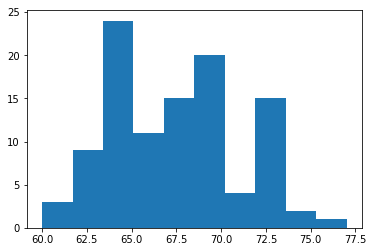

In [13]:
# 2c) Plot a histogram of the height data for all students who wrote 'cogs' as their major.

### BEGIN SOLUTION
plt.hist(df[df['major'] == 'cogs']['height']);
### END SOLUTION

f2 = plt.gcf()

In [14]:
assert f2.gca().has_data()

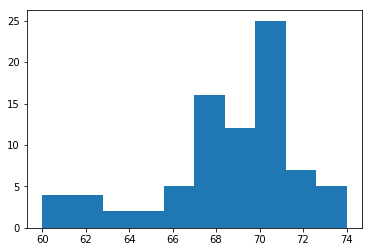

In [15]:
# 2d) Plot a histogram of the height data for all students who wrote 'cs' as their major.

### BEGIN SOLUTION
plt.hist(df[df['major'] == 'cs']['height']);
### END SOLUTION

f3 = plt.gcf()

In [16]:
assert f3.gca().has_data()

## Part 3: Exploring The Data

Beyond just plotting the data, we should check some other basic properties of the data. This serves both as a way to get a 'feel' for the data, and to look for any quirks or oddities about the data, that may indicate issues that need resolving. To do this, let's explore that data a bit (not limiting ourselves to only features that we plan to use - exploring the dataset as a whole can help us find any issues). 

Notes:
- You answers should NOT be pandas objects (Series or DataFrames), extract answers so the variables are ints, floats or strings (as appropriate).
- You must answer these questions programmatically: do not count / check and hard code particular values.

In [17]:
# 3a) How many different majors are in the dataset?
#  Save this number to a variable 'n_majors'. 

### BEGIN SOLUTION
n_majors = len(set(df['major']))
### END SOLUTION

In [18]:
assert n_majors

### BEGIN HIDDEN TESTS
assert n_majors == 21
### END HIDDEN TESTS

In [19]:
# 3b) What is the range (max value - min value) of ages in the dataset?
#  Save this number to a variable 'r_age'

### BEGIN SOLUTION
r_age = df['age'].max() - df['age'].min()
### END SOLUTION

In [20]:
assert r_age

### BEGIN HIDDEN TESTS
assert r_age == 14.
### END HIDDEN TESTS

In [21]:
# 3c) What is the most popular ice cream flavour?
#  Save the ice cream name to the variable 'f_ice', and the number of people who like it to a variable 'n_ice'.
#  Hint: you can get these values using the 'value_counts' method.

### BEGIN SOLUTION
f_ice = df['ice_cream'].value_counts().index[0]
n_ice = df['ice_cream'].value_counts()[0]
### END SOLUTION

In [22]:
assert n_ice
assert f_ice

### BEGIN HIDDEN TESTS
assert n_ice == 52
assert f_ice == 'vanilla'
### END HIDDEN TESTS

In [23]:
# 3d) How many people have a unique favourite ice cream? (How many ice cream flavours are only 1 persons favourite?)
#  Save this number to a variable 'u_ice'

### BEGIN SOLUTION
u_ice = sum(df['ice_cream'].value_counts() == 1)
### END SOLUTION

In [24]:
assert u_ice

### BEGIN HIDDEN TESTS
assert u_ice == 34
### END HIDDEN TESTS

## Part 4: Data Analysis

Now let's analyze the data, to address our research question.

For the purposes of this analysis, let's assume we need at least 75 students per major to analyze the height data. 

This means we are only going to use data from people who wrote 'cogs' or 'cs' as their major. 

Note that there are people who reported similar majors, such as 'math-cs' or 'cogs-dsgn'. 

We could consider combining some of these groups, but, for the purpose of this assignment, do NOT combine any different major labels together. This assignment assumes you use only data marked specfically as 'cogs' or 'cs'. 

In [25]:
# 4a) Pull out the data we are going to use:
#  Save the height data for all 'cogs' majors to a variable called 'h_co'
#  Save the height data for all 'cs' majors to a variable called 'h_cs'

### BEGIN SOLUTION
h_co = df[df['major'] == 'cogs']['height']
h_cs = df[df['major'] == 'cs']['height']
### END SOLUTION

In [26]:
assert np.all(h_co)
assert np.all(h_cs)

### BEGIN HIDDEN TESTS
assert len(h_co) == 104
assert len(h_cs) == 82
### END HIDDEN TESTS

In [27]:
# 4b) What is the average (mean) height for students from each major?
#  Save these values to 'avg_h_co' for cogs students, and 'avg_h_cs' for cs students. 

### BEGIN SOLUTION
avg_h_co = np.mean(h_co)
avg_h_cs = np.mean(h_cs)
### END SOLUTION

In [28]:
assert avg_h_co
assert avg_h_cs

### BEGIN HIDDEN TESTS
assert np.isclose(avg_h_co, 67.45, atol=0.1)
assert np.isclose(avg_h_cs, 68.5, atol=0.1)
### END HIDDEN TESTS

In [29]:
# Print out the average heights - this code provided
print('Average height of cogs majors: \t', avg_h_co)
print('Average height of cs majors: \t', avg_h_cs)

Average height of cogs majors: 	 67.45192307692308
Average height of cs majors: 	 68.5


Based on the cell above, it looks like there might indeed be a different in the average height for students in cogs vs cs majors. 

Now we want to statistically test this difference. To do so, we will use a t-test. 

In [30]:
# 4c) Use a t-test ('ttest_ind' function) to compare the two height distributions ('h_co' vs 'h_cs')
#  'ttest_ind' returns a t-statistic, and a p-value. Save these outputs to 't' and 'p' respectively. 

### BEGIN SOLUTION
t, p = ttest_ind(h_co, h_cs)
### END SOLUTION

In [31]:
assert t
assert p

### BEGIN HIDDEN TESTS
assert np.isclose(t, -2.07, atol=0.01)
assert np.isclose(p, 0.039, atol=0.001)
### END HIDDEN TESTS

In [32]:
# Check if statistical test passes significance - this code provided.
if p < 0.05:
    print('Data Science accomplished, there is a significant difference!')

Data Science accomplished, there is a significant difference!


Note: this test should pass significance. If it doesn't, check your code up until this point.

So - our research question has support! We're done right!?

#### We have a potentially interesting result: let's try and break it.

In particular, we should be worried about confounds. Correlation does not equal causation, and we should be asking whether this relationship can be better explained by some other variable. For example, we also have data on gender: let's see if differences in the gender ratio of the two majors can explain the different in height. 

In [33]:
# 4d) Using 'value_counts' from pandas, extract the number of 'm' and 'f', separately for cogs and cs students. 
#  Save the counts for each gender for 'cogs' majors to a variable called 'g_co'
#  Save the counts for each gender for 'cs' majors to a variable called 'g_cs'

### BEGIN SOLUTION
g_co = df[df['major'] == 'cogs']['gender'].value_counts()
g_cs = df[df['major'] == 'cs']['gender'].value_counts()
### END SOLUTION

In [34]:
assert np.all(g_co)
assert np.all(g_cs)

### BEGIN HIDDEN TESTS
assert g_co[0] == 62
assert g_cs[1] == 14
### END HIDDEN TESTS

In [35]:
# 4e) What is the ratio of women in each major? Use the 'g_co' and 'g_cs' variables to do so. 
#  Save the ratio of women in cogs to a variable 'r_co'
#  Save the ratio of women in cs to a variable 'r_cs'
#  Note: keep these numbers as ratios (they should be decimal numbers, less than 1)

### BEGIN SOLUTION
r_co = g_co['f'] / (g_co['m'] + g_co['f'])
r_cs = g_cs['f'] / (g_cs['m'] + g_cs['f'])
### END SOLUTION

In [36]:
assert r_co
assert r_cs

### BEGIN HIDDEN TESTS
assert np.isclose(r_co, 0.40, atol=0.01)
assert np.isclose(r_cs, 0.17, atol=0.01)
### END HIDDEN TESTS

In [37]:
# 4f) Create a new dataframe, called 'df2', which only includes data from 'cogs' and 'cs' majors.
#  Hint: you can do this using the or operate '|', with loc. 

### BEGIN SOLUTION
df2 = df.loc[(df["major"]=="cogs") | (df["major"]=="cs")] 
### END SOLUTION

In [39]:
assert isinstance(df2, pd.DataFrame)
assert df2.shape == (186, 8)
assert df2.isnull().sum().sum() == 0

### BEGIN HIDDEN TESTS
assert set(df2['major']) == set(['cogs', 'cs'])
### END HIDDEN TESTS

In [40]:
# 4g) Another way to look at these kinds of comparisons is pivot tables. 
#  Use the pandas 'pivot_table' method to create pivot table, assign it to a variable 'pv'
#  Set the values as'height', and the indices as 'gender' and 'major' in the pivot table.
#  Make sure you do this using 'df2'. 

### BEGIN SOLUTION
pv = df2.pivot_table(values=['height'], index=['gender', 'major'])
### END SOLUTION

In [41]:
assert np.all(pv)

### BEGIN HIDDEN TESTS
assert isinstance(pv.index, pd.MultiIndex)
assert np.all(pv.index.levels[0] == ['f', 'm'])
assert np.all(pv.index.levels[1] == ['cogs', 'cs'])
### END HIDDEN TESTS

In [42]:
# Print out the pivot table you just created. 
#  Compare the average height values, split up by major and gender.
#  Does it look like there are differences in heights by major, when spit up by major?
pv

height
gender major           
f      cogs   64.571429
       cs     64.285714
m      cogs   69.403226
       cs     69.367647

For the following question you will need to make some linear models, using Ordinary Least Squares (OLS).

There is more than one way to do this in Python. For the purposes of this assignment, you must use the method that is outlined in SectionMaterials 'LinearModels'. 

That is: 
- Create design matrices with 'patsy.dmatrices'
- Iniliaize an OLS model with 'sm.OLS'
- Fit the OLS model
- Check the summary for results. 

In [43]:
# 4h) Create a linear model to predict height from major (using df2 as data).
#  Use patsy.dmatrices to create the design matrices, calling the outputs 'outcome_1', 'predictors_1'
#  Create an OLS model (sm.OLS) using 'outcome_1' and 'predictors_1'. Call it 'mod_1'.
#  Fit the model, assigning it to 'res_1'

### BEGIN SOLUTION
outcome_1, predictors_1 = patsy.dmatrices('height ~ major', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
### END SOLUTION

In [70]:
assert isinstance(outcome_1, patsy.design_info.DesignMatrix)
assert isinstance(predictors_1, patsy.design_info.DesignMatrix)
assert isinstance(mod_1, sm.regression.linear_model.OLS)
assert isinstance(res_1, sm.regression.linear_model.RegressionResultsWrapper)

### BEGIN HIDDEN TESTS
assert 'height' in res_1.model.endog_names
assert len(res_1.model.exog_names) == 2
assert 'major' in res_1.model.exog_names[0] or \
    'major' in res_1.model.exog_names[1]
### END HIDDEN TESTS

In [ ]:
# Print out the summary results of the model fitting
print(res_1.summary())

In [ ]:
# 4i) Based on the model you ran above (using alpha value of 0.05), does major significantly predict height?
#  Set your answer as a boolean (True / False) to a variable called 'lm_1'.

### BEGIN SOLUTION
lm_1 = True
### END SOLUTION

In [ ]:
assert isinstance(lm_1, bool)

### BEGIN HIDDEN TESTS
assert lm_1
### END HIDDEN TESTS

In [56]:
# 4j) Create a linear model to predict height from both major and gender (using df2 as data).
#  Use patsy.dmatrices to create the design matrices, calling the outputs 'outcome_2', 'predictors_2'
#  Create an OLS model (sm.OLS) using 'outcome_2' and 'predictors_2'.  Call it 'mod_2'.
#  Fit the model, assigning it to 'res_2'

### BEGIN SOLUTION
outcome_2, predictors_2 = patsy.dmatrices("df2['height'] ~ gender + major", df2)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
### END SOLUTION

In [68]:
assert isinstance(outcome_2, patsy.design_info.DesignMatrix)
assert isinstance(predictors_2, patsy.design_info.DesignMatrix)
assert isinstance(mod_2, sm.regression.linear_model.OLS)
assert isinstance(res_2, sm.regression.linear_model.RegressionResultsWrapper)

### BEGIN HIDDEN TESTS
assert 'height' in res_2.model.endog_names
assert len(res_2.model.exog_names) == 3
assert 'gender' in res_2.model.exog_names[0] or \
    'gender' in res_2.model.exog_names[1] or \
    'gender' in res_2.model.exog_names[2]
assert 'major' in res_2.model.exog_names[0] or \
    'major' in res_2.model.exog_names[1] or \
    'major' in res_2.model.exog_names[2]
### END HIDDEN TESTS

In [ ]:
# Print out the results 
print(res_2.summary())

In [ ]:
# 4k) Based on the model you ran above (using alpha value of 0.05), does major significantly predict height?
#  Set your answer as a boolean (True / False) to a variable called 'lm_2'

### BEGIN SOLUTION
lm_2 = False
### END SOLUTION

In [ ]:
assert isinstance(lm_2, bool)

### BEGIN HIDDEN TESTS
assert not lm_2
### END HIDDEN TESTS

## Part 5: Discussion & Conclusions

In [ ]:
# 5a) Set a boolean variables, called 'ans', as True or False as the answer to the following question:
#  We have evidence supporting our research question:
#    People in different majors have systematically different heights. 

### BEGIN SOLUTION
ans = False
### END SOLUTION

In [ ]:
assert isinstance(ans, bool)

### BEGIN HIDDEN TESTS
assert not ans
### END HIDDEN TESTS

In [71]:
# 5b) Write a short response (1 sentence) summarizing the results.
#  Did we support our hypothesis? Why or why not?

# YOUR ANSWER HERE

## Parts 6-8: Other Stuff

This part of the assignment breaks from the project narrative we've using above. 

In the following questions, we will briefly explore some other topics, approaches and techniques that have (or will) be addressed in the class, and may be useful for you projects. These are 'toy' examples of these methods, used to get you working with these methods. 

Watch the class lectures for an overview of how these methods actually work, and go through the SectionMaterials notebooks (linked below) to see examples and guides as to how to use these methods in Python.

In [ ]:
# You will need the following functions for the last section of the assignment
#  You should not import any other functions
import scipy.stats as stats
from scipy.stats import normaltest
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from sklearn.decomposition import PCA

### Part 6: Testing Distributions

Above, we used a t-test, which assumes normal distributions. 

However, we did not check if our data are indeed normally distributed! When using methods / statistical tests that make certain assumptions, it's always best to explicitly check if your data meet those assumptions (otherwise the results may be invalid). Let's test if our data are in fact normally distributed.  

See an example of how to test the disributions of data in the 'TestingDistributions' notebook in SectionMaterials. 

In [ ]:
# For convenience, and consistency, we're providing this code to pull out the required data
h_co = df[df['major'] == 'cogs']['height'].values
h_cs = df[df['major'] == 'cs']['height'].values

In [ ]:
# 6a) For each of 'h_co', and 'h_cs', use the 'normaltest' function to test for normality of the distribution.
#  'normaltest' returns two values, a test statistic and a p-value
#    Save these values as 'st_co', 'p_co', 'st_cs', and 'p_cs' respectively.

### BEGIN SOLUTION
st_co, p_co = normaltest(h_co)
st_cs, p_cs = normaltest(h_cs)
### END SOLUTION

In [ ]:
assert st_co
assert p_co
assert st_cs
assert p_cs

### BEGIN HIDDEN TESTS
assert np.isclose(st_co, 3.33, atol=0.01)
assert np.isclose(p_co, 0.18, atol=0.01)
assert np.isclose(st_cs, 11.59, atol=0.01)
assert np.isclose(p_cs, 0.003, atol=0.001)
### END HIDDEN TESTS

Have a look at the values returned. 

Based on these results (and using an alpha significance value of 0.5):

Set boolean values (True, False) of whether each distribution can be considered to be normally distributed (set as True if the test supports it is normally distributed (or, more formally, we have not rejected the null hypothesis), and False if the test suggests the data is not normally distributed (we should reject the null hypothesis).

In [ ]:
# 6b) Set boolean values, as specified above.
#  For the 'h_co' data, set a boolean value to the var 'is_n_co'
#  For the 'h_cs' data, set a boolean value to the var 'is_n_cs'

### BEGIN SOLUTION
is_n_co = True
is_n_cs = False
### END SOLUTION

In [ ]:
assert isinstance(is_n_co, bool)
assert isinstance(is_n_cs, bool)

### BEGIN HIDDEN TESTS
assert is_n_co
assert not is_n_cs
### END HIDDEN TESTS

In [ ]:
# CO data: plot the comparison to a normal distribution (this code provided)
xs = np.arange(h_co.min(), h_co.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_co), np.std(h_co))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(h_co, normed=True, label='Actual Data');
plt.legend();

In [ ]:
# CS data: plot the divergence from normal distribution (this code provided)
xs = np.arange(h_cs.min(), h_cs.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_cs), np.std(h_cs))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(h_cs, normed=True, label='Actual Data');
plt.legend();

### Part 7: Clustering

Suppose we have reason to believe there are distinct clusters of students in the class - a group of younger students, in earlier years, and a group of older students, closer to graduation. However, we do not know which students are in which group, nor the boundaries that define the groups. 

This is a clustering problem - here you will use KMeans to dry and find the clusters from the data. 

See an example of how to use sklearn, and specifically KMeans, for clustering in the 'Clustering' notebook in SectionMaterials.

In [ ]:
# For convenience, and consistency, we're providing this code to pull out the required data
d1 = df[df['major'] == 'cogs']['year'].values
d2 = df[df['major'] == 'cogs']['age'].values

In [ ]:
# 7a) For both 'd1', and 'd2' (separately) use the 'whiten' function to whiten the data. 
#  Save the outputs to 'd1w', and 'd2w' repectively. 

### BEGIN SOLUTION
d1w = whiten(d1)
d2w = whiten(d2)
### END SOLUTION

In [ ]:
assert np.all(d1w)
assert np.all(d2w)

### BEGIN HIDDEN TESTS
assert round(np.var(d1w)) == 1
assert round(np.var(d2w)) == 1
### END HIDDEN TESTS

In [ ]:
# 7b) Initialize a Kmeans model object. Call it 'km'.
#  Initialize it with 'n_clusters' of 2, and 'random_state' of 42.

### BEGIN SOLUTION
km = KMeans(n_clusters=2, random_state=42)
### END SOLUTION

In [ ]:
assert isinstance(km, KMeans)

### BEGIN HIDDEN TESTS
assert km.n_clusters == 2
assert km.random_state == 42
### END HIDDEN TESTS

In [ ]:
# For convenience, and consistency, we're providing this code to combine the data into required format.
cl_dat = np.array([d1w, d2w]).T

In [ ]:
# 7c) Use the 'fit' method of the KMeans object (km) to fit the data ('cl_dat').

### BEGIN SOLUTION
km.fit(cl_dat)
### END SOLUTION

In [ ]:
assert np.any(km.labels_)

### BEGIN HIDDEN TESTS
assert sum(km.labels_) == 29
### END HIDDEN TESTS

In [ ]:
# Let's check out our clusters (this code provided).
plt.scatter(d1, d2, c=km.labels_);
plt.xlabel('Year');
plt.ylabel('Age');

### Part 8: Dimensionality Reduction

Sometimes we have data that have many dimensions, perhaps too many to deal with, and so we might need to try and use dimensionality reduction: that is to try and find a lower dimensional space that captures as much of the information as we can from the original, high-dimensional, dataset. 

As an example, in our data, we have height and weight that are quite correlated, and we could use Principal Components Analysis (PCA), in order to try and capture the most information about a persons' height and weight in a single number - projecting this 2D data down into 1 dimension. 

See an example of how to use sklearn, and specifcally PCA, for dimensionality reduction in the 'Dimensionality Reduction' notebook in SectionMaterials.

In [ ]:
# Check out the height vs. weight data
plt.plot(df['height'].values, df['weight'].values, '.')

In [ ]:
# For convenience, and consistency, we're providing this code to pull out the required data
d1_h = df['height'].values
d2_w = df['weight'].values

In [ ]:
# 8a) Initialize a PCA object. Call it 'dr'. 
#  Initialize it with 'n_components' of 1, and 'whiten' as True.

### BEGIN SOLUTION
dr = PCA(n_components=1, whiten=True)
### END SOLUTION

In [ ]:
assert isinstance(dr, PCA)

### BEGIN HIDDEN TESTS
assert dr.n_components == 1
assert dr.whiten
### END HIDDEN TESTS

In [ ]:
# For convenience, and consistency, we're providing this code to combine the data into required format
dr_dat = np.array([d1_h, d2_w]).T

In [ ]:
# 8b) Use the 'fit_transform' method of the PCA object (dr) on the data ('dr_dat')
#  This method fits the dimensionality reduction model, and then transforms the data with it. 
#  Save the output (the transformed data) to 'out'

### BEGIN SOLUTION
out = dr.fit_transform(dr_dat)
### END SOLUTION

In [ ]:
assert np.all(out)
assert out.shape == (335, 1)

### BEGIN HIDDEN TESTS
assert np.isclose(out.max(), 3.19, atol=0.01)
assert np.isclose(out.min(), -3.13, atol=0.01)
### END HIDDEN TESTS

In [ ]:
# Check the transformed data (this code provided)
#  Since this data is now 1D, the x-axis is just index
#  Now, for each student, we have a (whitened) single number representing combined height & weight 
plt.plot(out, '.');